4. Test a hypothesis and construct a confidence interval for the difference
in proportions of two populations

In [30]:
import pandas as pd
from scipy import stats
from scipy.stats import norm
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Hypothesis

The proportion of restaurants with parking availability differs between rural and downtown locations.

**Hypotheses**:
   - $H_0: p_1 - p_2 = 0$ (no difference in proportions).
   - $H_A: p_1 - p_2 \neq 0$ (there is a difference in proportions).


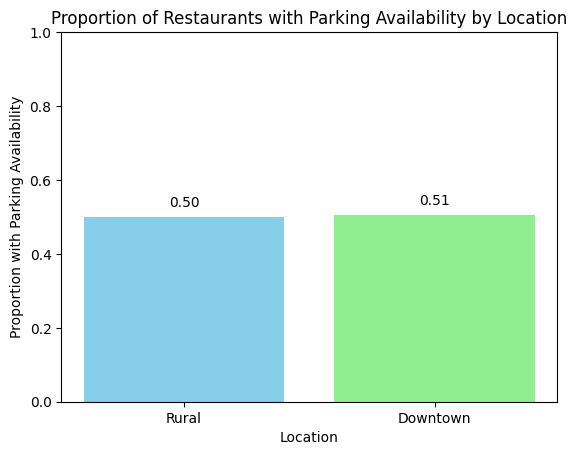

In [31]:
# Load your data
data = pd.read_csv('restaurant_data.csv')

# Segregate data into two groups based on location
rural_restaurants = data[data['Location'] == 'Rural']
downtown_restaurants = data[data['Location'] == 'Downtown']


# Calculate the proportions of restaurants with parking in each group
p1 = rural_restaurants['Parking Availability'].value_counts(normalize=True).get('Yes', 0)
p2 = downtown_restaurants['Parking Availability'].value_counts(normalize=True).get('Yes', 0)

# Data for visualization
labels = ['Rural', 'Downtown']
proportions = [p1, p2]

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(labels, proportions, color=['skyblue', 'lightgreen'])

# Add labels and title
ax.set_xlabel('Location')
ax.set_ylabel('Proportion with Parking Availability')
ax.set_title('Proportion of Restaurants with Parking Availability by Location')
ax.set_ylim(0, 1)

# Add data labels on the bars
for i, v in enumerate(proportions):
    ax.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom')

plt.show()

Caculate the z tatistic and p value

In [32]:
# Count the number of successes (restaurants with parking) and the total number of observations in each group
count = [rural_restaurants['Parking Availability'].value_counts().get('Yes', 0),
         downtown_restaurants['Parking Availability'].value_counts().get('Yes', 0)]
nobs = [len(rural_restaurants), len(downtown_restaurants)]

# Perform the z-test
z_stat, pval = proportions_ztest(count, nobs)

print(f"Z-test statistic: {z_stat}")
print(f"P-value: {pval}")

Z-test statistic: -0.4646313955167066
P-value: 0.6421954452244107


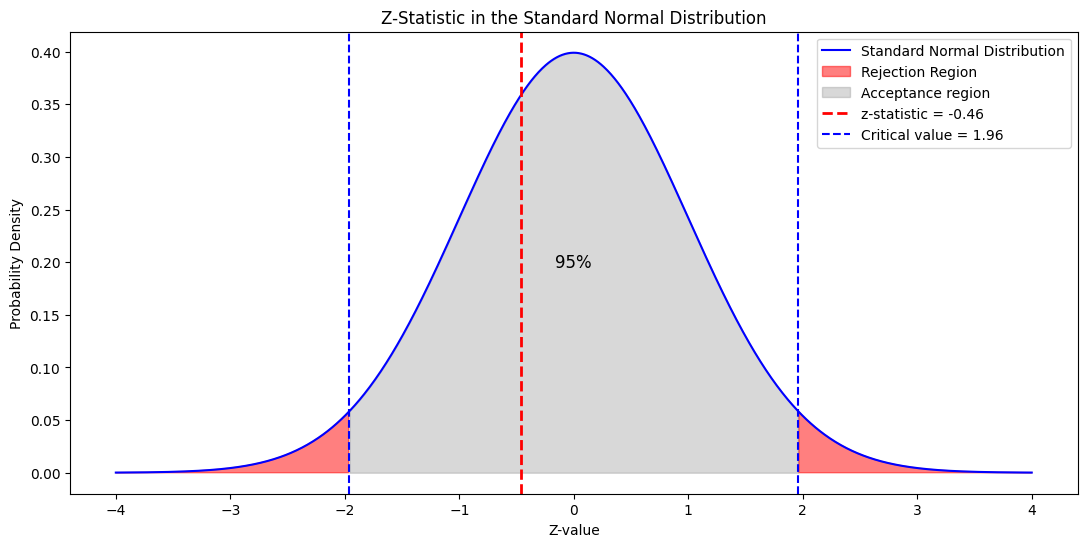

In [33]:
# Generate data for the standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)
z = norm.ppf(0.975)
# Create the plot
fig, ax = plt.subplots(figsize=(13, 6))

# Plot the standard normal distribution
ax.plot(x, y, label='Standard Normal Distribution', color='blue')

# Fill the rejection regions
ax.fill_between(x, y, where=(x >= z) | (x <= -z), color='red', alpha=0.5, label='Rejection Region')

plt.fill_between(x, y, where=(x <= z) & (x >= -z), color='grey', alpha=0.3, label='Acceptance region')

# Highlight the t-statistic
# Plot the z-statistic line
ax.axvline(z_stat, color='red', linestyle='--', linewidth=2, label=f'z-statistic = {z_stat:.2f}')

plt.axvline(x=z, color='blue', linestyle='--', label='Critical value = {:.2f}'.format(z))
plt.axvline(x=-z, color='blue', linestyle='--',)

# Add labels and title
ax.set_xlabel('Z-value')
ax.set_ylabel('Probability Density')
ax.set_title('Z-Statistic in the Standard Normal Distribution')
ax.legend()

# Add text for the 95% acceptance region
ax.text(0*z, max(y)/2, '95%', fontsize=12, verticalalignment='center', horizontalalignment='center', color='black')

# Display the plot
plt.show()

Since the z-statistic is outside the rejection region which , we fail to reject the null hypothesis. There is not enough evidence to conclude that the proportion of restaurants with parking availability differs between rural and downtown locations.

### Confidence Interval


In [37]:
# Proportions
p_rural = p1
p_downtown = p2

# Sample sizes
n_rural = len(rural_restaurants)
n_downtown = len(downtown_restaurants)

# Calculate the pooled proportion
p_pool = (count[0] + count[1]) / (n_rural + n_downtown)

# Standard error for the difference in proportions
se_diff = np.sqrt(p_pool * (1 - p_pool) * (1/n_rural + 1/n_downtown))

# Calculate the difference in proportions
diff = p_rural - p_downtown

# Confidence interval
z_score = 1.96  # for 95% confidence
ci_lower = diff - z_score * se_diff
ci_upper = diff + z_score * se_diff

ci = (ci_lower, ci_upper)

print(f"Difference in proportions: {diff}")
print(f"95% confidence interval: {ci}")


Difference in proportions: -0.006218618456127478
95% confidence interval: (-0.032451224112177254, 0.020013987199922294)


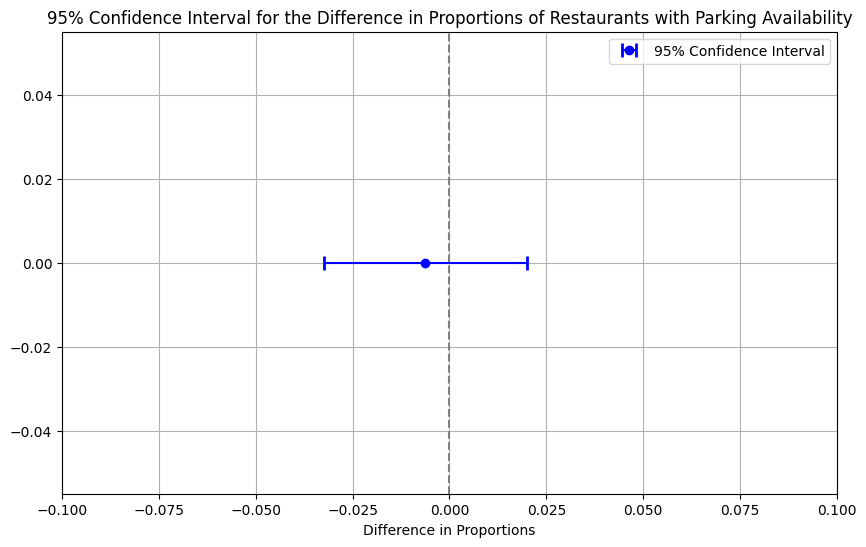

In [46]:
# Visualizing the Confidence Interval for the Difference in Proportions in a Horizontal Format

# Calculate the margin of error
margin_of_error = z_score * se_diff

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the difference in proportions with error bars representing the confidence interval
plt.errorbar(y=0, x=diff, xerr=[[diff - ci_lower], [ci_upper - diff]], fmt='o', color='b', capsize=5, capthick=2, label='95% Confidence Interval')

# Add a vertical line at 0 to show no difference
plt.axvline(0, color='gray', linestyle='--')

# Customize y-ticks and labels
plt.xlabel('Difference in Proportions')
plt.title('95% Confidence Interval for the Difference in Proportions of Restaurants with Parking Availability')
plt.legend()
plt.grid(True)

# Adjust the x-limits to zoom out
plt.xlim(-0.1, 0.1)

# Display the plot
plt.show()